### Preveja os usuários com alta chance de deixar seu Streaming

Utilize um modelo de classificação para mapear qual o perfil de
usuários tem mais chance de deixar sua plataforma de streaming.
Compreender quem é o perfil que está aumentando o churn do seu
negócio é essencial para tomar ações que reduzam essas perdas,
seja alterando critérios na venda ou modificando o produto.


## Data Understanding

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/streaming_data.csv')
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
# descrição dos dados:
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [ ]:
# número de valores nulos:

df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

## Data Preparation

In [ ]:
# Substituir valores “NaN” por 0 Colunas → Time_on_platform, Num_streaming_services, Churned, Avg_rating, Devices_connected

# Lista das colunas onde você deseja substituir os valores nulos por zero
colunas_para_substituir = ['Time_on_platform', 'Num_streaming_services','Churned', 'Avg_rating', 'Devices_connected']

# Substituindo os valores nulos por zero nas colunas específicas
df[colunas_para_substituir] = df[colunas_para_substituir].fillna(0)

In [ ]:
df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform              0
Devices_connected             0
Subscription_type         25221
Num_streaming_services        0
Num_active_profiles           0
Avg_rating                    0
Churned                       0
User_id                       0
dtype: int64

In [ ]:
#Dropar linhas nulas nas colunas Gender, Subscription_type e Age

df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  float64
 3   Devices_connected       36515 non-null  float64
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  float64
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  float64
 9   User_id                 36515 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [ ]:
#Transformando valores churned 0 e 1 por No e Yes

df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  float64
 3   Devices_connected       36515 non-null  float64
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  float64
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  object 
 9   User_id                 36515 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 3.1+ MB


In [ ]:
# Transformando valores floats em valores inteiros

for coluna in df.columns:
  if (df[coluna].apply(lambda x: type(x) == float)).all():
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce').astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     36515 non-null  int64 
 1   Gender                  36515 non-null  object
 2   Time_on_platform        36515 non-null  int64 
 3   Devices_connected       36515 non-null  int64 
 4   Subscription_type       36515 non-null  object
 5   Num_streaming_services  36515 non-null  int64 
 6   Num_active_profiles     36515 non-null  int64 
 7   Avg_rating              36515 non-null  int64 
 8   Churned                 36515 non-null  object
 9   User_id                 36515 non-null  object
dtypes: int64(6), object(4)
memory usage: 3.1+ MB


## Modelagem dos Dados - Regressão Logística

In [ ]:
 #Definir variáveis X e y para o modelo
from sklearn.preprocessing import LabelEncoder
X = df.drop(columns = ['User_id', 'Churned'], axis = 1)
X = pd.get_dummies(X)
y = df['Churned']

le = LabelEncoder()
le.fit(y)
y = le.transform(y)
y = pd.DataFrame(y)

In [ ]:
#Realizar o .fit do modelo
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

X = pd.DataFrame(mm.fit_transform(X))

In [ ]:
#Separar em train e test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [ ]:
#Realizar a modelagem

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churn,label
97,0.568627,0.000000,0.0,0.0,0.25,0.6,0.0,1.0,1.0,0.0,0.0,1,0
16140,0.019608,0.085740,1.0,0.0,0.75,0.4,0.0,1.0,1.0,0.0,0.0,0,0
1693,0.980392,0.804316,0.6,1.0,0.75,0.6,0.0,1.0,0.0,0.0,1.0,1,0
34007,0.078431,0.180272,1.0,0.0,0.25,0.0,0.0,1.0,1.0,0.0,0.0,1,0
3296,0.862745,0.964494,0.6,0.0,0.25,0.6,1.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17912,0.980392,0.394794,0.0,0.0,0.25,0.2,0.0,1.0,0.0,1.0,0.0,1,0
35739,0.509804,0.821098,0.0,0.0,0.25,0.0,0.0,1.0,1.0,0.0,0.0,0,0
10403,0.549020,0.381208,0.2,0.0,0.25,0.6,1.0,0.0,1.0,0.0,0.0,0,0
32323,0.549020,0.553374,0.8,0.0,1.00,0.4,0.0,1.0,1.0,0.0,0.0,0,0


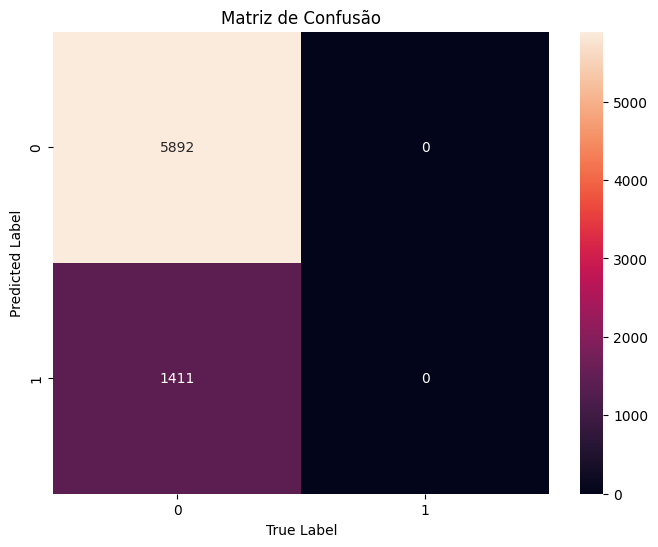

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, lr.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Matriz de Confusão')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8067574969190744
Acurácia (Teste): 0.8067917294262632
Acurácia Balanceada (Treino): 0.5
Acurácia Balanceada (Teste): 0.5
Precision (Treino): 0.0
Precision (Teste): 0.0
Recall (Treino): 0.0
Recall (Teste): 0.0
F1-Score (Treino): 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1-Score (Teste): 0.0
ROCAUC (Treino): 0.5101773384688465
ROCAUC (Teste): 0.5149359869091799


## Modelagem dos Dados - Tunning


In [ ]:
#Definir variáveis X e y para o modelo

from sklearn.model_selection import GridSearchCV


param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Tipo de penalidade
    'C': [0.1, 1, 10],  # Parâmetro de regularização
    'fit_intercept': [True, False],  # Se deve ou não calcular a interceptação para este modelo
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algoritmo de otimização
    'max_iter': [100, 500, 1000]  # Número máximo de iterações
}


# Realize a pesquisa em grade usando validação cruzada (cross-validation)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
810 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'fit_intercept': [True, False],
                         'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [ ]:
print("Melhores Hiperparâmetros:", grid_search.best_params_)

Melhores Hiperparâmetros: {'C': 0.1, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
lr_tunned =  LogisticRegression(C = 0.1, fit_intercept = True, max_iter = 100, penalty = 'l1', solver = 'liblinear')
lr_tunned

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [ ]:
#Realizar o .fit do modelo

lr_tunned.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [ ]:
X_test.assign(churn = y_test).assign(label = lr_tunned.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churn,label
97,0.568627,0.000000,0.0,0.0,0.25,0.6,0.0,1.0,1.0,0.0,0.0,1,0
16140,0.019608,0.085740,1.0,0.0,0.75,0.4,0.0,1.0,1.0,0.0,0.0,0,0
1693,0.980392,0.804316,0.6,1.0,0.75,0.6,0.0,1.0,0.0,0.0,1.0,1,0
34007,0.078431,0.180272,1.0,0.0,0.25,0.0,0.0,1.0,1.0,0.0,0.0,1,0
3296,0.862745,0.964494,0.6,0.0,0.25,0.6,1.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17912,0.980392,0.394794,0.0,0.0,0.25,0.2,0.0,1.0,0.0,1.0,0.0,1,0
35739,0.509804,0.821098,0.0,0.0,0.25,0.0,0.0,1.0,1.0,0.0,0.0,0,0
10403,0.549020,0.381208,0.2,0.0,0.25,0.6,1.0,0.0,1.0,0.0,0.0,0,0
32323,0.549020,0.553374,0.8,0.0,1.00,0.4,0.0,1.0,1.0,0.0,0.0,0,0


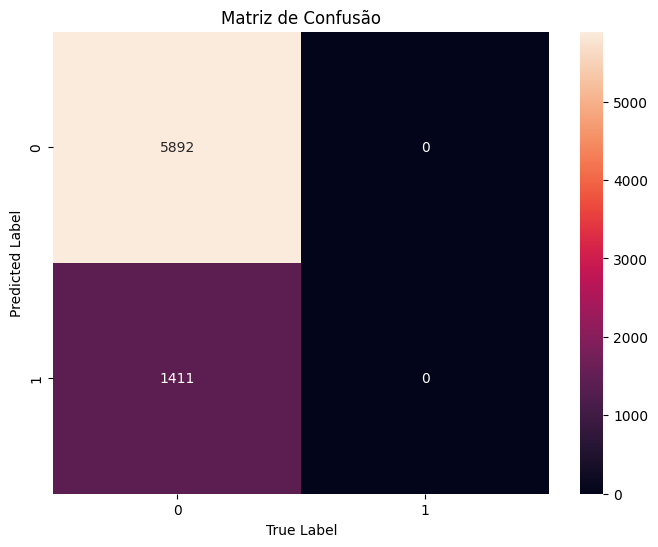

In [ ]:


cm = confusion_matrix(y_test, lr_tunned.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
print(f"Acurácia (Treino): {accuracy_score(y_train, lr_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr_tunned.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr_tunned.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr_tunned.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr_tunned.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr_tunned.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr_tunned.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr_tunned.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr_tunned.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr_tunned.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8067574969190744
Acurácia (Teste): 0.8067917294262632
Acurácia Balanceada (Treino): 0.5
Acurácia Balanceada (Teste): 0.5
Precision (Treino): 0.0
Precision (Teste): 0.0
Recall (Treino): 0.0
Recall (Teste): 0.0
F1-Score (Treino): 0.0
F1-Score (Teste): 0.0
ROCAUC (Treino): 0.5103440794075486
ROCAUC (Teste): 0.5078738940426857


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Modelagem dos Dados - Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [ ]:
rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_test.assign(churn = y_test).assign(label = rf.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churn,label
97,0.568627,0.000000,0.0,0.0,0.25,0.6,0.0,1.0,1.0,0.0,0.0,1,0
16140,0.019608,0.085740,1.0,0.0,0.75,0.4,0.0,1.0,1.0,0.0,0.0,0,0
1693,0.980392,0.804316,0.6,1.0,0.75,0.6,0.0,1.0,0.0,0.0,1.0,1,0
34007,0.078431,0.180272,1.0,0.0,0.25,0.0,0.0,1.0,1.0,0.0,0.0,1,1
3296,0.862745,0.964494,0.6,0.0,0.25,0.6,1.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17912,0.980392,0.394794,0.0,0.0,0.25,0.2,0.0,1.0,0.0,1.0,0.0,1,0
35739,0.509804,0.821098,0.0,0.0,0.25,0.0,0.0,1.0,1.0,0.0,0.0,0,0
10403,0.549020,0.381208,0.2,0.0,0.25,0.6,1.0,0.0,1.0,0.0,0.0,0,0
32323,0.549020,0.553374,0.8,0.0,1.00,0.4,0.0,1.0,1.0,0.0,0.0,0,0


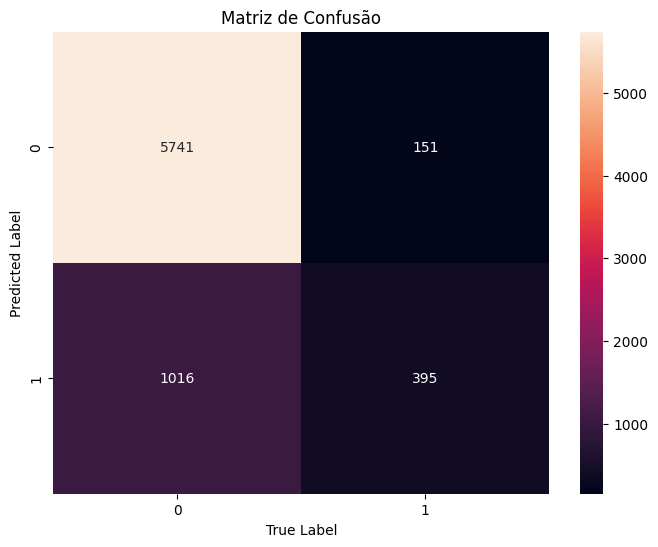

In [ ]:
cm = confusion_matrix(y_test, rf.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.9940435437491442
Acurácia (Teste): 0.8402026564425579
Acurácia Balanceada (Treino): 0.9882254550967761
Acurácia Balanceada (Teste): 0.6271576662466326
Precision (Treino): 0.9903208460297545
Precision (Teste): 0.7234432234432234
Recall (Treino): 0.978742249778565
Recall (Teste): 0.2799433026222537
F1-Score (Treino): 0.9844975053456878
F1-Score (Teste): 0.4036791006642821
ROCAUC (Treino): 0.9997205186592187
ROCAUC (Teste): 0.6909703026795092


In [ ]:

param_grid = {
   'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500]}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)


In [ ]:

grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]})

In [ ]:
print("Melhores Hiperparâmetros:", grid_search.best_params_)

Melhores Hiperparâmetros: {'max_depth': 10, 'n_estimators': 100}


In [ ]:
rf_tunned =  RandomForestClassifier(max_depth = 10, n_estimators= 100)

In [ ]:
rf_tunned.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=10)

In [ ]:
X_test.assign(churn = y_test).assign(label = rf_tunned.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,10,churn,label
97,0.568627,0.000000,0.0,0.0,0.25,0.6,0.0,1.0,1.0,0.0,0.0,1,0
16140,0.019608,0.085740,1.0,0.0,0.75,0.4,0.0,1.0,1.0,0.0,0.0,0,0
1693,0.980392,0.804316,0.6,1.0,0.75,0.6,0.0,1.0,0.0,0.0,1.0,1,0
34007,0.078431,0.180272,1.0,0.0,0.25,0.0,0.0,1.0,1.0,0.0,0.0,1,0
3296,0.862745,0.964494,0.6,0.0,0.25,0.6,1.0,0.0,0.0,0.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17912,0.980392,0.394794,0.0,0.0,0.25,0.2,0.0,1.0,0.0,1.0,0.0,1,0
35739,0.509804,0.821098,0.0,0.0,0.25,0.0,0.0,1.0,1.0,0.0,0.0,0,0
10403,0.549020,0.381208,0.2,0.0,0.25,0.6,1.0,0.0,1.0,0.0,0.0,0,0
32323,0.549020,0.553374,0.8,0.0,1.00,0.4,0.0,1.0,1.0,0.0,0.0,0,0


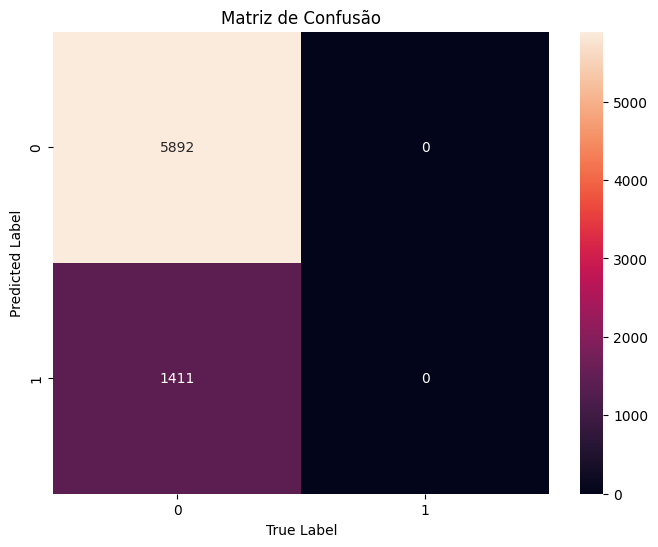

In [ ]:
cm = confusion_matrix(y_test, rf_tunned.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
print(f"Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf_tunned.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8080925646994386
Acurácia (Teste): 0.8067917294262632
Acurácia Balanceada (Treino): 0.5034543844109832
Acurácia Balanceada (Teste): 0.5
Precision (Treino): 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision (Teste): 0.0
Recall (Treino): 0.006908768821966342
Recall (Teste): 0.0
F1-Score (Treino): 0.013722730471498943
F1-Score (Teste): 0.0
ROCAUC (Treino): 0.8812626519126837
ROCAUC (Teste): 0.5863830306249558
